![alt text](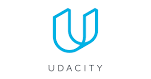 "Udacity") ![alt text](https://www.miskacademy.edu.sa/app/themes/misk-academy/images/logos.png "Misk") 




# Project: Investigate a Dataset - No Show Appointments
## by: Almutairi, Muhanned
![alt text](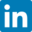 "LinkedIn profile")[LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.
    * ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    * ‘Neighborhood’ indicates the location of the hospital.
    * ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    * Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> At first we want to study conditions and relationsships to 'no shows'. What is the relationship between no-shows'cases to the following?
    * Scholarship( whether or not the patient is enrolled in Brasilian welfare program Bolsa Família)
    * Lead days
    * Day of week

> The second part of the analysis shall study performance of SMS-reminders. Did SMS-reminders decrease the proportion of patients not showing up?

> On this reports, pandas, numpy and matplotlib would be used to data wranglisng, exploratory data analysis, data visulaziation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#What size does the table, now dataframe have?
df.shape

(110527, 14)

In [4]:
#Get an overview over the colums types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Checking for null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#check for duplicated items
sum(df.duplicated())

0

In [7]:
#Getting to know the rough value distribution of each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Typos in the column names as well as their format should be corrected / unified
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

## General Observations

* The dataset has 14 colums and 110, 527 rows, has no duplicates.

* There are 13 independent variables and one dependent (no_show) in the dataset.

* No missing values.

* The types of ScheduledDay and Appointmentday need converted to DateTime.

* There is no such data column for lead days. This can be easily calculated.

* Also, there is no such a column that indicates how appointments are distributed among days of week.

* To answer the our questions, the columns 'Gender','Neighbourhood', 'Diabetes', 'Alcoholism', 'Hipertension', and 'Handcap do not seem necessary and therefore will be dropped.

### Data Cleaning

In [9]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Convert the day columns types
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

# Check if the type is now datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

In [11]:
# Create a new lead_days column
df['lead_days'] = (df.appointment_day - df.scheduled_day).dt.days

In [12]:
# Lets Check if the column exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  lead_days        110

> For better understanding, lets category the lead days. To avoid the problem of some lead day values having very few samples, or even none, we bin lead days into categories. The bins are not uniform, because as we can see, same-day appointments are very different from where the lead day is 1 or 3. this would be beneficial for better understanding the rest in some important aspects.

In [13]:
# Lets create lead_days_category column
lead_days_labels = pd.Series(['A: Same day', 'B: 1-3 days', 'C: 4-7 days', 'D: 8-14 days', 'E: 15-31 days', 'F: 32+ days'])
df['lead_days_category'] = pd.cut(df.lead_days, bins = [-1, 0, 3, 7, 14, 31, 999], labels = lead_days_labels)

In [14]:
# Then create appointment_dow column
df['appointment_dow'] = df.scheduled_day.dt.dayofweek

# Check the values for appointment with regards to day of work
df['appointment_dow'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: appointment_dow, dtype: int64

> PS: The day of the week with Monday=0, Sunday=6.

In [15]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_days,lead_days_category,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,A: Same day,4


In [16]:
# drop all the column that not seem necessary 
df.drop(['patient_id','appointment_id','scheduled_day','appointment_day','age','gender','neighbourhood', 'diabetes', 'alcoholism', 'hypertension', 'handicap'], axis=1, inplace=True)

In [17]:
# lets save the cleaned dataset
df.to_csv('df_Cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1:  Are there the relationship between no-shows'cases to the following?
   * Patients who has scholarship or not.
   * Lead days
   * Day of week

In [18]:
# importing the cleaned data set
df_Cleaned = pd.read_csv('df_Cleaned.csv') 

First of all lets calculate How many percent of patients missed their scheduled appointment?


In [19]:
appointments = df_Cleaned.shape[0]
missed = len(df_Cleaned.query('no_show == \'Yes\''))
missed_ratio = int(round(missed/appointments*100))

In [20]:
print('{}% of appointments were missed.'.format(missed_ratio))

20% of appointments were missed.


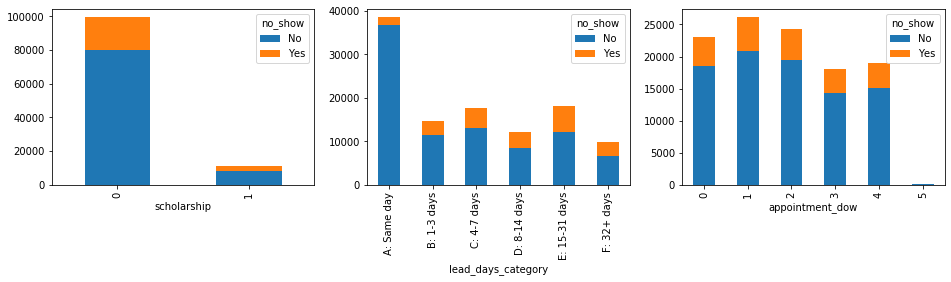

In [21]:
# Then , let's look at our there 'scholarship' 'lead_days_category', 'appointment_dow' variables
categorical_vars = ['scholarship', 'lead_days_category', 'appointment_dow']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df_Cleaned.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

> The graphs above show the proportions of appointments with no-show.
Look at the scholarship graph, it is obvious that most of the patients who have not scholarship are more likely to miss their appointment than others who have.

> For the second graph, It seems the group, who has lead days between 15-31days, has the hight proportions of appointments with no-show compared to other groups.

> For the third graph, on Saturdays, there is no missed appointment that has been recorded. all other days look similar in the proportions of appointments with the no-show.

To analyze the scholarship graph, we need to run some calculations.

In [22]:
# to calculate the patients who has a scholarship or not and weather show up or no
x1 = len(df_Cleaned.loc[df_Cleaned['scholarship'] == 0])
x2 = len(df_Cleaned.loc[df_Cleaned['scholarship'] == 1])
x3 = len(df_Cleaned.query('no_show == "Yes" and scholarship == "0"'))
x4 = len(df_Cleaned.loc[(df_Cleaned['scholarship'] == 1) & (df_Cleaned['no_show'] == "Yes")])

In [23]:
# to calculate the ratio
r1 = int(round(x3/x1*100))
r2 = int(round(x4/x2*100))

In [24]:
print('Out of {} appointments made by patients who has no scholarship, {} were missed with the ratio of {}%.'.format(x1, x3, r1))
print('Out of {} appointments made by patients who has scholarship, {} were missed with the ratio of {}%.'.format(x2, x4, r2))

Out of 99666 appointments made by patients who has no scholarship, 19741 were missed with the ratio of 20%.
Out of 10861 appointments made by patients who has scholarship, 2578 were missed with the ratio of 24%.


The second graph shows an interesting insight, for the group who has an appointment on the same day some portion not show up. let calculated 

In [25]:
# lets calculate number of patients with no lead time
t1 = len(df_Cleaned.query('lead_days  == 0'))
t2 = len(df_Cleaned.query('lead_days  == 0 and no_show == "Yes"'))
tr = int(round(t2/t1*100))
print('Out of (in total {}) all patients scheduling an appointment for the same day: ,{} of patients did not show up with ratio ({}%).'.format(t1, t2, tr))

Out of (in total 38563) all patients scheduling an appointment for the same day: ,1792 of patients did not show up with ratio (5%).


### Research Question 2: Did SMS-reminders decrease the proportion of patients not showing up?

In order to answer this question, we first need to calculate the number of patients who received an SMS reminder or not at each case of showed or no showup. Thereafter we can analyze the percent of No-shows for each case.

In [26]:
# lets start with first case where the patients has received SMS reminder
smsyy= len(df_Cleaned.loc[(df['sms_received'] == 1) & (df_Cleaned['no_show'] == "Yes")])
smsyn= len(df_Cleaned.loc[(df['sms_received'] == 1) & (df_Cleaned['no_show'] == "No")])

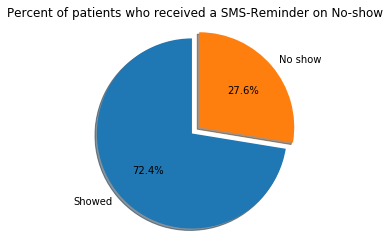

In [27]:
# then visualize using the Pie chart
labels = 'Showed', 'No show'
sizes = [smsyn, smsyy]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio 
plt.title('Percent of patients who received a SMS-Reminder on No-show')
plt.show()

In [28]:
# lets do for the second case where  the patients has not received SMS reminder
smsny = len(df_Cleaned.loc[(df['sms_received'] == 0) & (df_Cleaned['no_show'] == "Yes")])
smsnn= len(df_Cleaned.loc[(df['sms_received'] == 0) & (df_Cleaned['no_show'] == "No")])

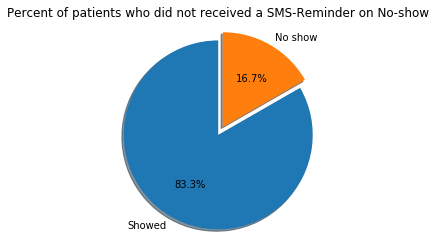

In [29]:
# then visualize using the Pie chart
labels = 'Showed', 'No show'
sizes = [smsnn, smsny]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio 
plt.title('Percent of patients who did not received a SMS-Reminder on No-show')
plt.show()

Surprisingly, the percent of no-show up patients who received a SMS-reminder is high compared to those who did not receive a reminder. 

<a id='conclusions'></a>
## Conclusions
Below our finding:

* Frankly speaking, we assume the patients who have scholarship are less more likely to miss their scheduling appointment but our initial analysis indicates that no large impact on the showcases with regards to scholarship variables. The difference is only 4%.

* With regard to lead time, patients who are their appointments for scheduled the same day are much more likely to show up. And the percent of no show increases with the increase of lead days.

* On Saturdays, there is no missed appointment that has been recorded. all other days look similar in the proportions of appointments with the no-show.

* Lastly, and most surprisingly is the fact that SMS reminder has not better effects on reminding the patients of their upcoming appointment.


> PS: To better performance of the doing analysis with regards to SMS reminder, we shall use the patient ID to group the patients with two or more appointments in the dataset then run analysis based on "before" and "after" scenario. This grouping segmentation puts the focus on whether a reminder decreases no-shows. 

> The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows. There could be interesting to know how much time passed between a visit scheduling time and the actual visit time.